<a href="https://colab.research.google.com/github/Chiranjibilawati10/pytorch_fundamentals/blob/main/pytorchworkflowprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=["A","B","c"])

In [2]:
#putting all together
#importing pytorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

#check the pytorch version
torch.__version__


'2.6.0+cu124'

In [3]:
#setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
#create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
#split the data

# Remove the extra unsqueeze and unnecessary tensor conversions
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(loc="best");

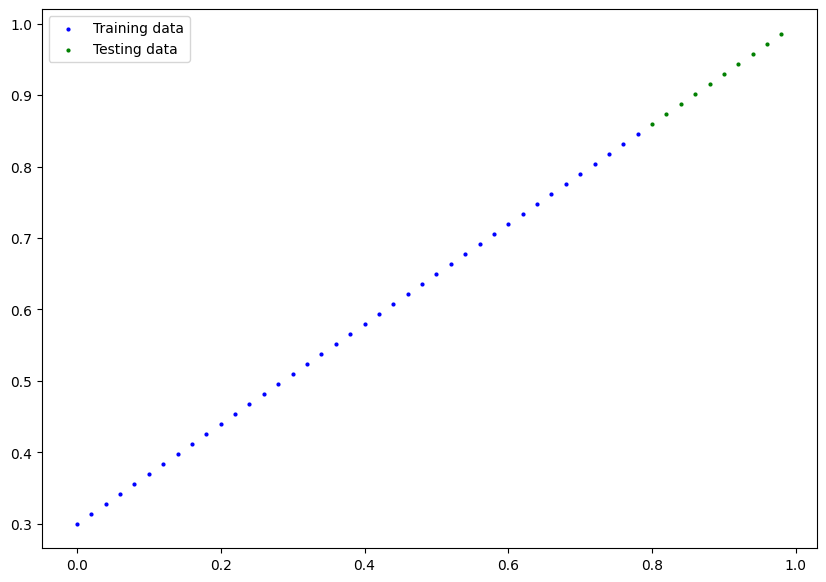

In [10]:
#plot the data
plot_predictions(X_train, y_train, X_test, y_test)

In [11]:
#building the pytorch linear model
#creatging liner model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1
                                  )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
    #set the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [12]:
  X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [13]:
### Training
### for training we need
# loss function
#optimizer
#training loop
# testing loop

#setup the loss function
loss_fn = nn.L1Loss()

#setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [14]:
#training loop
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)

  #calculate the loss
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad

  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

 ##testing
  model_1.eval()

  with torch.inference_mode():
   test_pred = model_1(X_test)

   test_loss = loss_fn(test_pred, y_test)

 #print out the result
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [15]:
#making evalution
model_1.eval()
with torch.inference_mode():
 y_preds = model_1(X_test)  # Shape will match X_test
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

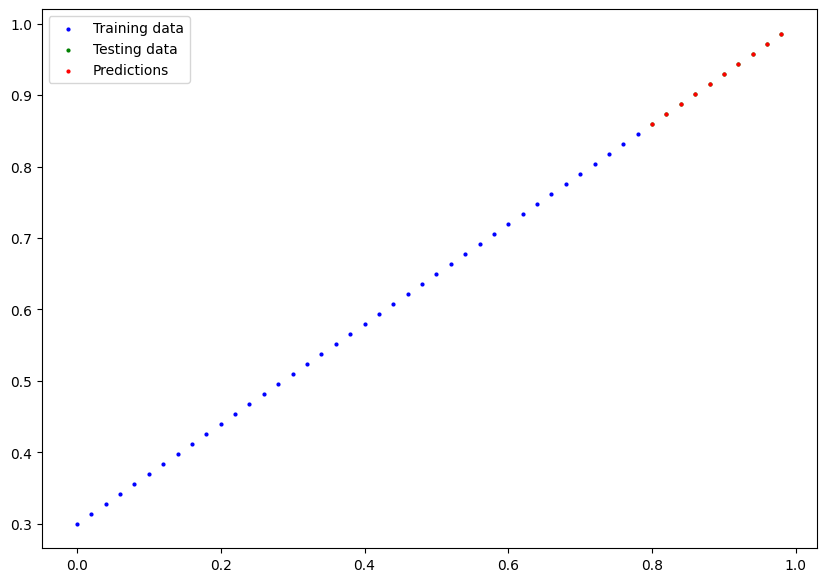

In [17]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [20]:
#saving and loading the trained model
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME = "01_pytorch_workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model1.pth


In [21]:
#load a pytorch

loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
from pickle import loads
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])